In [ ]:
# Importing Libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
import pickle as pkl
import bz2
import scipy.stats as stats
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Upper_Secondary.csv to Upper_Secondary.csv


In [ ]:
data = pd.read_csv("Upper_Secondary.csv")
data.head()

,Country,Year,Upper Secondary Completion Rate,"Adjusted net enrollment rate, primary (% of primary school age children)","Current education expenditure, secondary (% of total expenditure in secondary public institutions)","Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)",Expenditure on secondary education (% of government expenditure on education),"Government expenditure on education, total (% of GDP)","Government expenditure on education, total (% of government expenditure)","Government expenditure per student, secondary (% of GDP per capita)","Labor force, total","Literacy rate, adult total (% of people ages 15 and above)","Literacy rate, youth (ages 15-24), gender parity index (GPI)","Literacy rate, youth total (% of people ages 15-24)","Pupil-teacher ratio, upper secondary","Secondary education, teachers",Trained teachers in upper secondary education (% of total teachers),"Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Afghanistan,2011,13.72,89.789451,84.109398,39.531597,26.624320,3.462010,5.146922,12.567120,7098230.0,31.448851,0.518970,46.990051,17.449996,309477.972,80.888441,7.947
1,Bangladesh,2011,13.45,89.789451,98.293800,24.182819,41.144950,2.132700,16.793970,11.218710,57602724.0,58.769180,1.039490,77.984993,28.090580,376914.000,46.808475,3.750
2,Bhutan,2011,50.40,88.952490,91.859086,39.531597,56.739140,4.765230,11.387510,30.142140,341235.0,82.502618,0.958893,89.401063,16.575510,5058.000,80.888441,3.230
3,India,2011,34.98,95.717610,91.859086,26.888550,36.962540,3.796180,13.564910,15.228460,472419461.0,69.302559,0.908990,86.144882,20.667730,309477.972,80.888441,8.168
4,Kazakhstan,2011,91.17,99.219920,91.859086,39.531597,31.426609,3.493521,18.104574,18.975351,8798238.0,82.502618,0.958893,89.401063,17.449996,309477.972,80.888441,5.390


In [ ]:
data.shape

(1070, 18)

<Axes: >

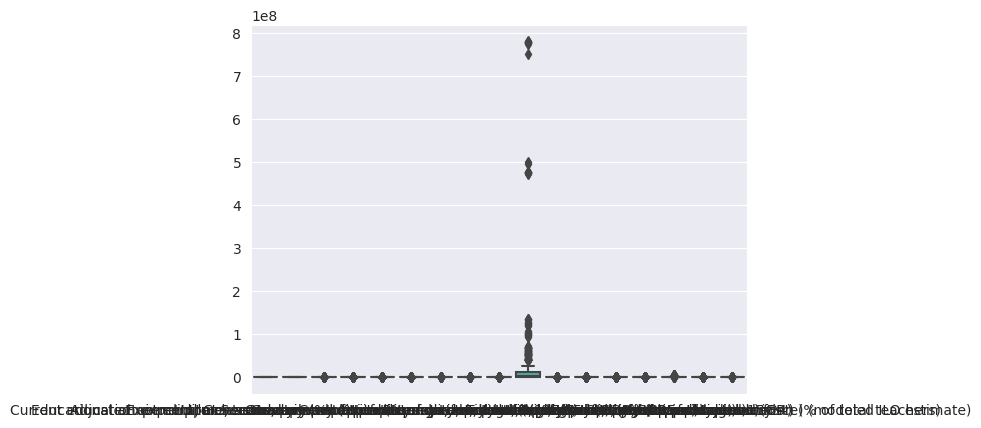

In [ ]:
#Outliers
sns.boxplot(data=data)

In [ ]:
# Drop columns that may not contribute significantly
columns_to_drop = ['Country', 'Year', 'Labor force, total']

# Drop the selected columns
data_cleaned = data.drop(columns=columns_to_drop)

# Display the cleaned data
data_cleaned.head()

,Upper Secondary Completion Rate,"Adjusted net enrollment rate, primary (% of primary school age children)","Current education expenditure, secondary (% of total expenditure in secondary public institutions)","Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)",Expenditure on secondary education (% of government expenditure on education),"Government expenditure on education, total (% of GDP)","Government expenditure on education, total (% of government expenditure)","Government expenditure per student, secondary (% of GDP per capita)","Literacy rate, adult total (% of people ages 15 and above)","Literacy rate, youth (ages 15-24), gender parity index (GPI)","Literacy rate, youth total (% of people ages 15-24)","Pupil-teacher ratio, upper secondary","Secondary education, teachers",Trained teachers in upper secondary education (% of total teachers),"Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,13.72,89.789451,84.109398,39.531597,26.624320,3.462010,5.146922,12.567120,31.448851,0.518970,46.990051,17.449996,309477.972,80.888441,7.947
1,13.45,89.789451,98.293800,24.182819,41.144950,2.132700,16.793970,11.218710,58.769180,1.039490,77.984993,28.090580,376914.000,46.808475,3.750
2,50.40,88.952490,91.859086,39.531597,56.739140,4.765230,11.387510,30.142140,82.502618,0.958893,89.401063,16.575510,5058.000,80.888441,3.230
3,34.98,95.717610,91.859086,26.888550,36.962540,3.796180,13.564910,15.228460,69.302559,0.908990,86.144882,20.667730,309477.972,80.888441,8.168
4,91.17,99.219920,91.859086,39.531597,31.426609,3.493521,18.104574,18.975351,82.502618,0.958893,89.401063,17.449996,309477.972,80.888441,5.390


In [ ]:
data_cleaned.shape

(1070, 15)

In [ ]:

data_cleaned.describe().round()

,Upper Secondary Completion Rate,"Adjusted net enrollment rate, primary (% of primary school age children)","Current education expenditure, secondary (% of total expenditure in secondary public institutions)","Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)",Expenditure on secondary education (% of government expenditure on education),"Government expenditure on education, total (% of GDP)","Government expenditure on education, total (% of government expenditure)","Government expenditure per student, secondary (% of GDP per capita)","Literacy rate, adult total (% of people ages 15 and above)","Literacy rate, youth (ages 15-24), gender parity index (GPI)","Literacy rate, youth total (% of people ages 15-24)","Pupil-teacher ratio, upper secondary","Secondary education, teachers",Trained teachers in upper secondary education (% of total teachers),"Unemployment, total (% of total labor force) (modeled ILO estimate)"
count,1070.0,1070.0,1070.0,1070.0,1070.0,1070.0,1070.0,1070.0,1070.0,1070.0,1070.0,1070.0,1070.0,1070.0,1070.0
mean,44.0,90.0,92.0,40.0,31.0,4.0,15.0,19.0,83.0,1.0,89.0,17.0,309478.0,81.0,8.0
std,27.0,8.0,5.0,14.0,6.0,2.0,4.0,5.0,9.0,0.0,9.0,4.0,736645.0,10.0,6.0
min,1.0,35.0,49.0,2.0,1.0,0.0,2.0,1.0,22.0,0.0,21.0,4.0,66.0,13.0,0.0
25%,18.0,90.0,92.0,40.0,31.0,3.0,13.0,19.0,83.0,1.0,89.0,17.0,36126.0,81.0,4.0
50%,44.0,90.0,92.0,40.0,31.0,4.0,15.0,19.0,83.0,1.0,89.0,17.0,309478.0,81.0,6.0
75%,64.0,94.0,92.0,40.0,31.0,5.0,17.0,19.0,83.0,1.0,89.0,17.0,309478.0,81.0,11.0
max,98.0,100.0,100.0,97.0,72.0,14.0,35.0,73.0,100.0,1.0,100.0,83.0,6589956.0,100.0,32.0


<Axes: title={'center': 'CORRELATION HEATMAP'}>

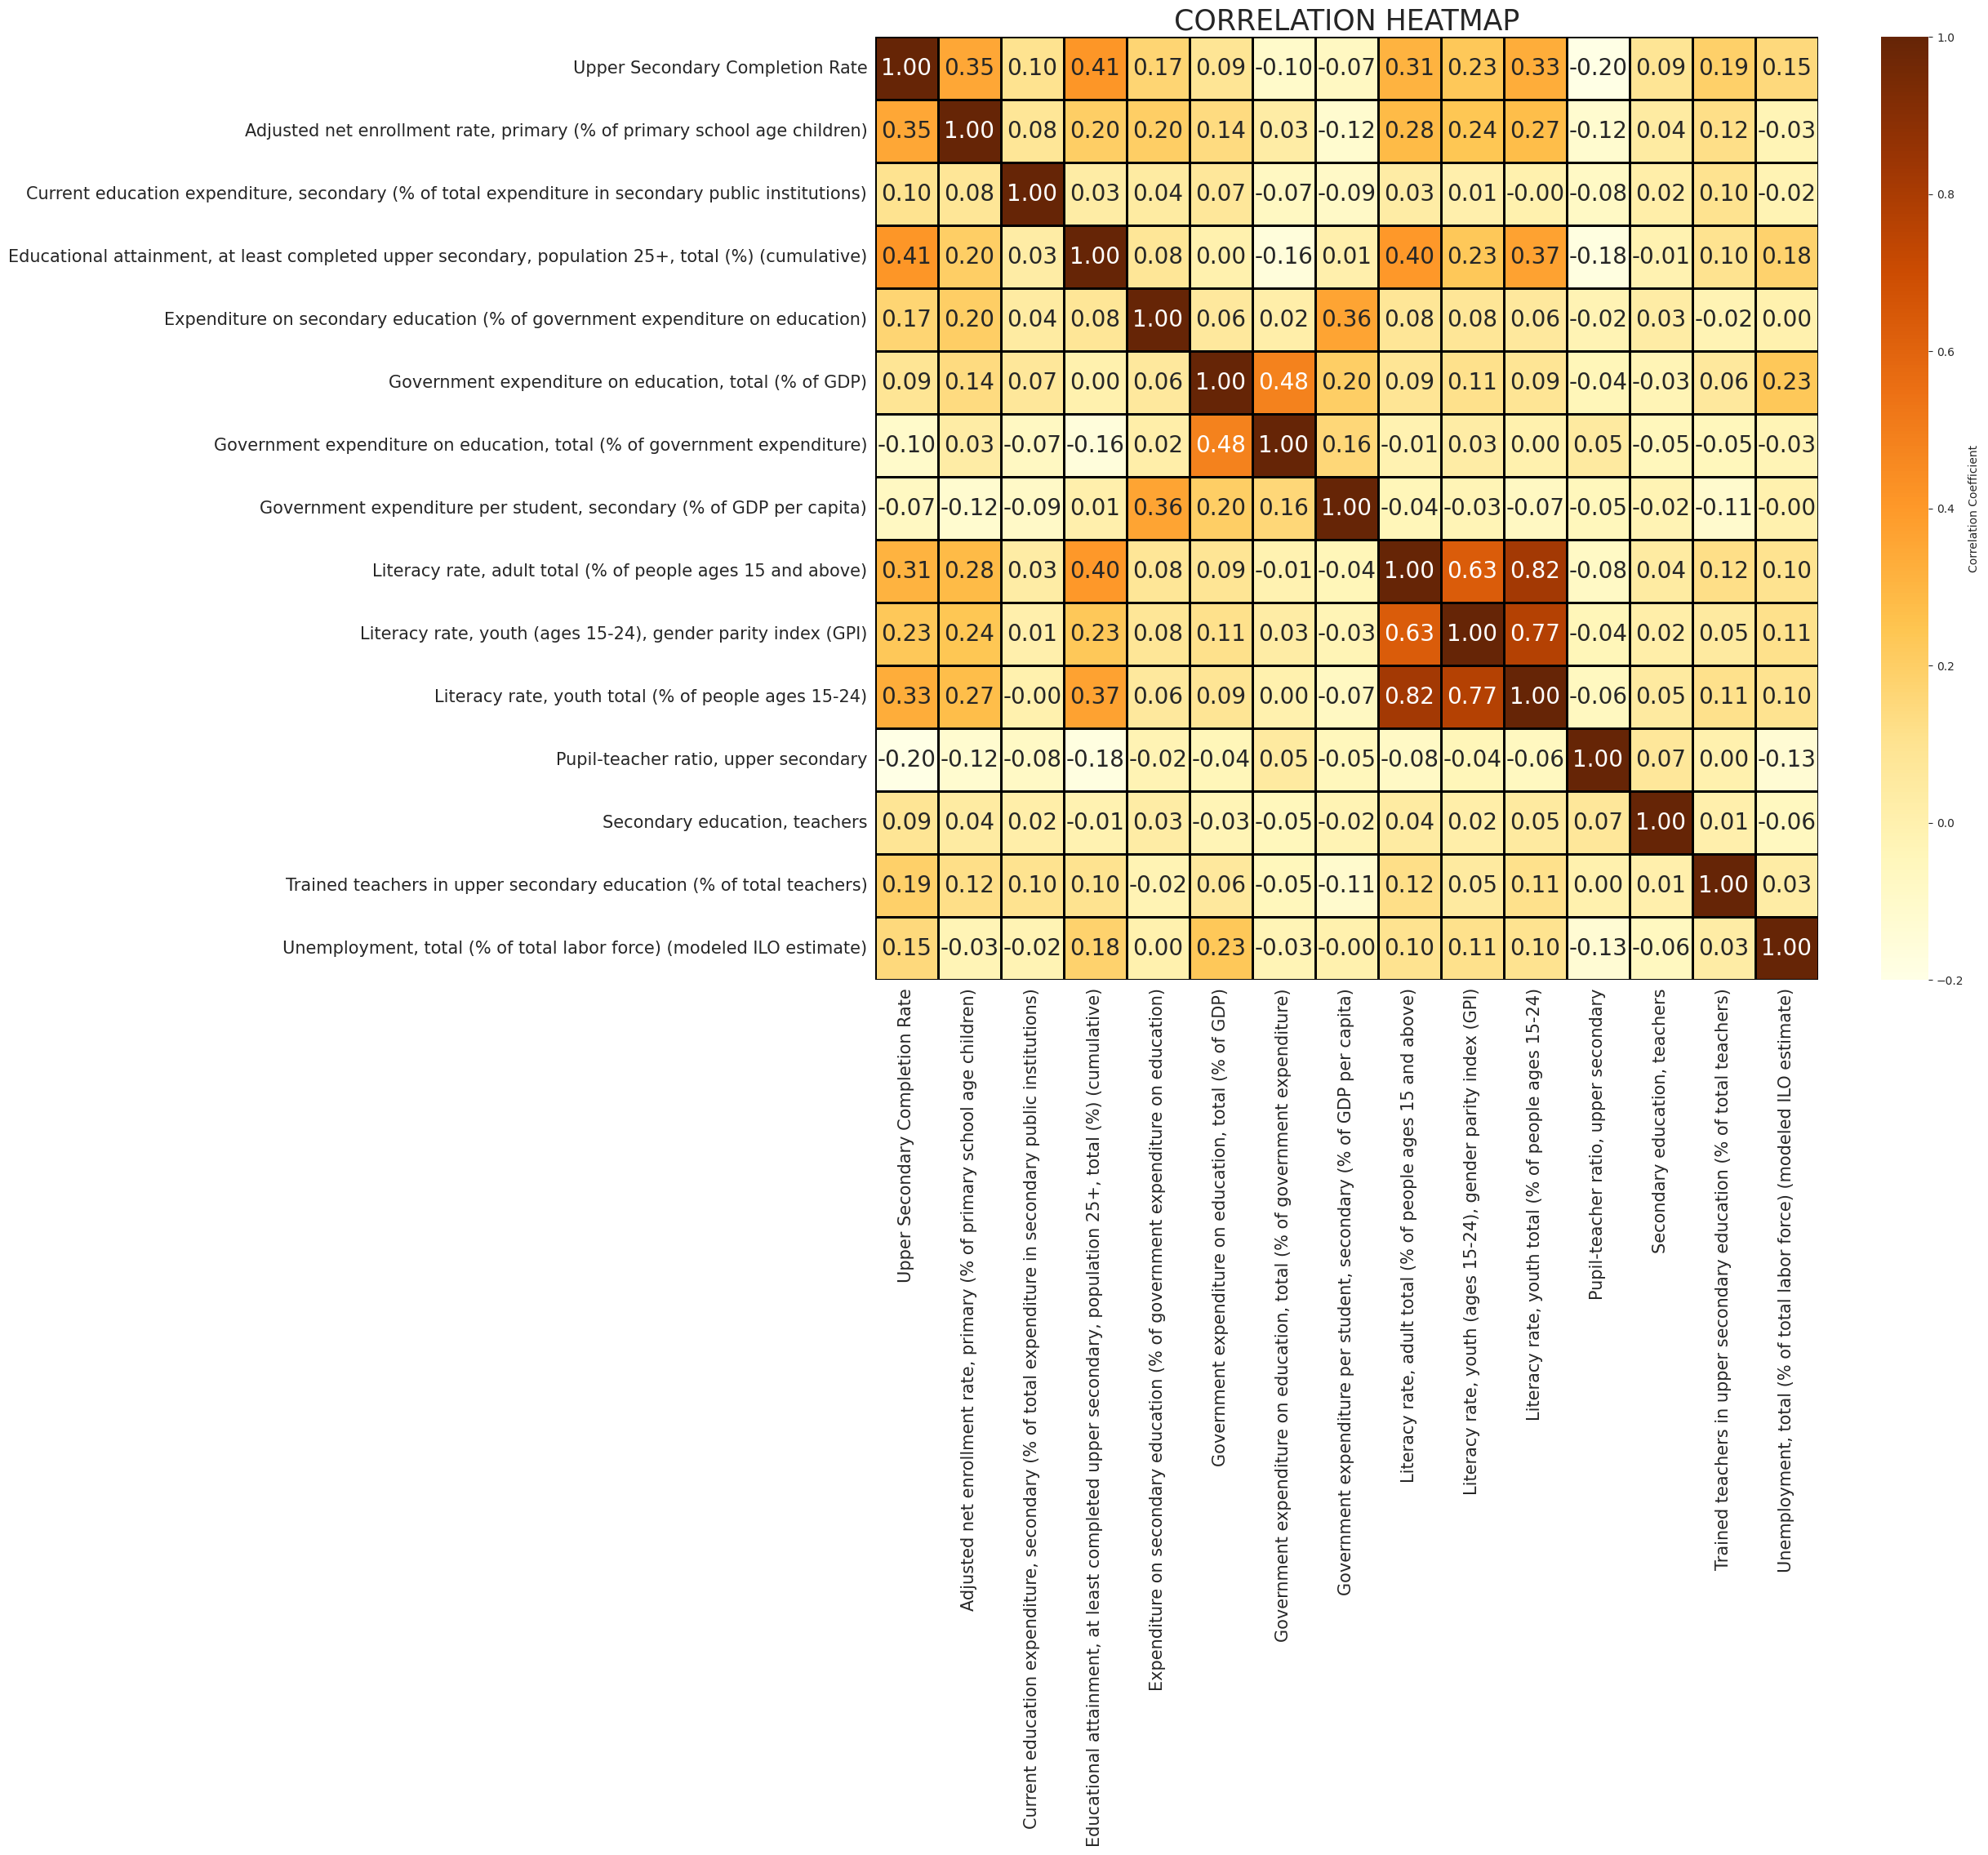

In [ ]:
corr = data_cleaned.corr(numeric_only=True).round(2)
plt.figure(figsize = (20,15))

plt.xticks(fontsize=15)  # Increase font size of x-axis labels (variable names)
plt.yticks(fontsize=15)  # Increase font size of y-axis labels (variable names)
plt.title("CORRELATION HEATMAP", fontsize=25)

sns.heatmap(corr, annot=True, annot_kws={'size': 20}, cmap='YlOrBr', linewidths=0.5, cbar_kws={'label': 'Correlation Coefficient'}, fmt=".2f", square=True, linewidth=1, linecolor='black')

In [ ]:
# Extract features and target variable
features = data_cleaned.drop('Upper Secondary Completion Rate', axis=1)
target = data_cleaned['Upper Secondary Completion Rate']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
# Normalize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

               Algorithm  Mean Squared Error  Mean Absolute Error  R-squared
0          Random Forest          269.825851            11.423393   0.627746
1  Polynomial Regression          439.910537            17.053105   0.393096
2      Gradient Boosting          245.007312            11.259288   0.661986


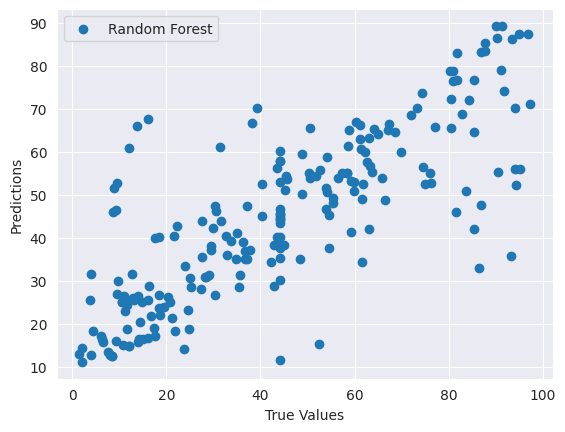

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt


# Normalize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 1: Random Forest Regressor (Hyperparameter Tuning)
param_grid_rf = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

model_rf_tuned = RandomForestRegressor(random_state=42)
random_search_rf = RandomizedSearchCV(model_rf_tuned, param_distributions=param_grid_rf, n_iter=20, cv=5, random_state=42)
random_search_rf.fit(X_train_scaled, y_train)
best_params_rf = random_search_rf.best_params_
model_rf_final = RandomForestRegressor(**best_params_rf, random_state=42)
model_rf_final.fit(X_train_scaled, y_train)
predictions_rf_final = model_rf_final.predict(X_test_scaled)
mse_rf_final = mean_squared_error(y_test, predictions_rf_final)
mae_rf_final = mean_absolute_error(y_test, predictions_rf_final)
r2_rf_final = r2_score(y_test, predictions_rf_final)

# Model 2: Linear Regression (Feature Engineering)
model_lr_poly = make_pipeline(PolynomialFeatures(2), LinearRegression())
model_lr_poly.fit(X_train_scaled, y_train)
predictions_lr_poly = model_lr_poly.predict(X_test_scaled)
mse_lr_poly = mean_squared_error(y_test, predictions_lr_poly)
mae_lr_poly = mean_absolute_error(y_test, predictions_lr_poly)
r2_lr_poly = r2_score(y_test, predictions_lr_poly)

# Model 3: Gradient Boosting Regressor (Hyperparameter Tuning)
param_grid_gb = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.5],
    'max_depth': [3, 5, 7]
}

model_gb_tuned = GradientBoostingRegressor(random_state=42)
random_search_gb = RandomizedSearchCV(model_gb_tuned, param_distributions=param_grid_gb, n_iter=20, cv=5, random_state=42)
random_search_gb.fit(X_train_scaled, y_train)
best_params_gb = random_search_gb.best_params_
model_gb_final = GradientBoostingRegressor(**best_params_gb, random_state=42)
model_gb_final.fit(X_train_scaled, y_train)
predictions_gb_final = model_gb_final.predict(X_test_scaled)
mse_gb_final = mean_squared_error(y_test, predictions_gb_final)
mae_gb_final = mean_absolute_error(y_test, predictions_gb_final)
r2_gb_final = r2_score(y_test, predictions_gb_final)

# Create a table for the results
results_data = {
    'Algorithm': ['Random Forest', 'Polynomial Regression', 'Gradient Boosting'],
    'Mean Squared Error': [mse_rf_final, mse_lr_poly, mse_gb_final],
    'Mean Absolute Error': [mae_rf_final, mae_lr_poly, mae_gb_final],
    'R-squared': [r2_rf_final, r2_lr_poly, r2_gb_final]
}

results_df = pd.DataFrame(results_data)

# Print the results table
print(results_df)

# Plot Results (Assuming you want to plot results for one of the models)
plt.scatter(y_test, predictions_rf_final, label='Random Forest')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()

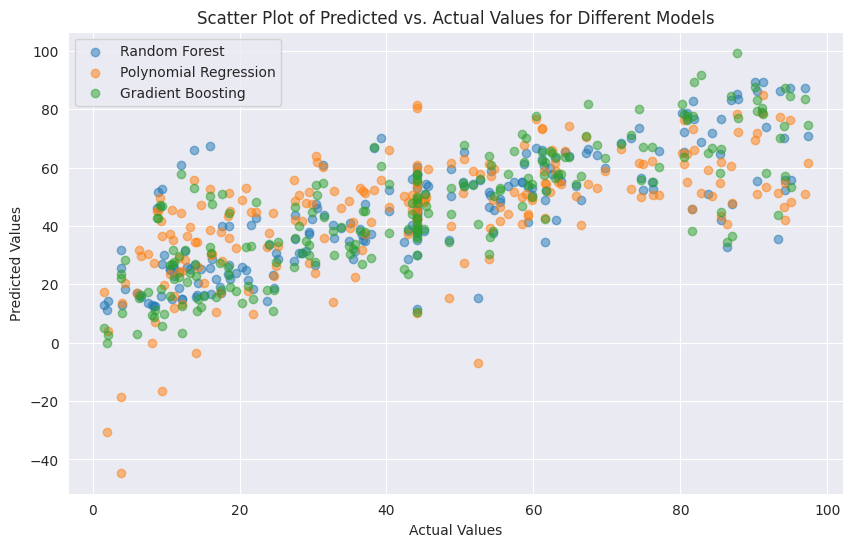

In [ ]:
# Plot Results for all models (Scatter Plot)
plt.figure(figsize=(10, 6))

plt.scatter(y_test, predictions_rf_final, label='Random Forest', alpha=0.5)
plt.scatter(y_test, predictions_lr_poly, label='Polynomial Regression', alpha=0.5)
plt.scatter(y_test, predictions_gb_final, label='Gradient Boosting', alpha=0.5)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs. Actual Values for Different Models')
plt.legend()
plt.show()

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR  # Import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Model 1: Random Forest Regressor (Hyperparameter Tuning)
param_grid_rf = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

model_rf_tuned = RandomForestRegressor(random_state=42)
random_search_rf = RandomizedSearchCV(model_rf_tuned, param_distributions=param_grid_rf, n_iter=20, cv=5, random_state=42)
random_search_rf.fit(X_train_scaled, y_train)
best_params_rf = random_search_rf.best_params_
model_rf_final = RandomForestRegressor(**best_params_rf, random_state=42)
model_rf_final.fit(X_train_scaled, y_train)
predictions_rf_final = model_rf_final.predict(X_test_scaled)
mse_rf_final = mean_squared_error(y_test, predictions_rf_final)
mae_rf_final = mean_absolute_error(y_test, predictions_rf_final)
r2_rf_final = r2_score(y_test, predictions_rf_final)

# Model 2: Support Vector Regression (SVR)
param_grid_svr = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['linear', 'rbf']
}

model_svr_tuned = SVR()
random_search_svr = RandomizedSearchCV(model_svr_tuned, param_distributions=param_grid_svr, n_iter=20, cv=5, random_state=42)
random_search_svr.fit(X_train_scaled, y_train)
best_params_svr = random_search_svr.best_params_
model_svr_final = SVR(**best_params_svr)
model_svr_final.fit(X_train_scaled, y_train)
predictions_svr_final = model_svr_final.predict(X_test_scaled)
mse_svr_final = mean_squared_error(y_test, predictions_svr_final)
mae_svr_final = mean_absolute_error(y_test, predictions_svr_final)
r2_svr_final = r2_score(y_test, predictions_svr_final)




/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 18 is smaller than n_iter=20. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
# Model 3: Gradient Boosting Regressor (Hyperparameter Tuning)
param_grid_gb = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.5],
    'max_depth': [3, 5, 7]
}

model_gb_tuned = GradientBoostingRegressor(random_state=42)
random_search_gb = RandomizedSearchCV(model_gb_tuned, param_distributions=param_grid_gb, n_iter=20, cv=5, random_state=42)
random_search_gb.fit(X_train_scaled, y_train)
best_params_gb = random_search_gb.best_params_
model_gb_final = GradientBoostingRegressor(**best_params_gb, random_state=42)
model_gb_final.fit(X_train_scaled, y_train)
predictions_gb_final = model_gb_final.predict(X_test_scaled)
mse_gb_final = mean_squared_error(y_test, predictions_gb_final)
mae_gb_final = mean_absolute_error(y_test, predictions_gb_final)
r2_gb_final = r2_score(y_test, predictions_gb_final)

           Algorithm  Mean Squared Error  Mean Absolute Error  R-squared
0      Random Forest          269.825851            11.423393   0.627746
1                SVR          364.655984            14.504605   0.496918
2  Gradient Boosting          245.007312            11.259288   0.661986


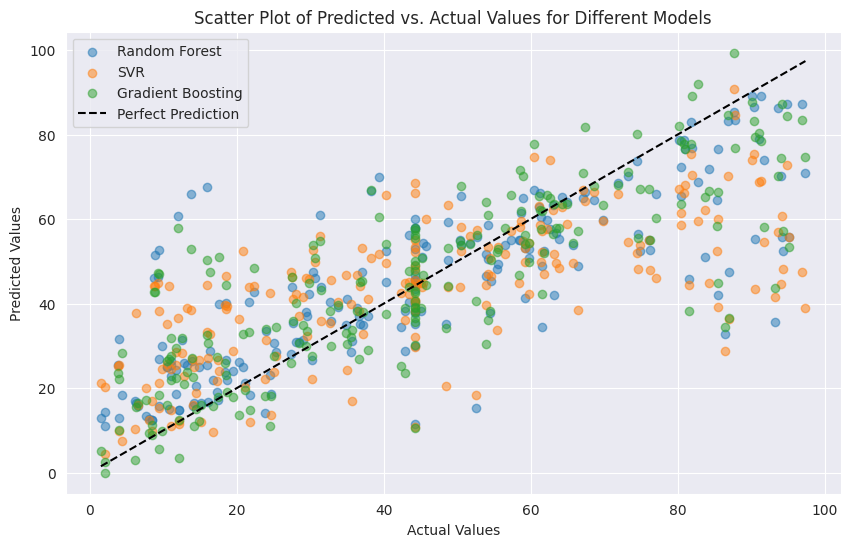

In [ ]:
# Create a table for the results
results_data = {
    'Algorithm': ['Random Forest', 'SVR', 'Gradient Boosting'],
    'Mean Squared Error': [mse_rf_final, mse_svr_final, mse_gb_final],
    'Mean Absolute Error': [mae_rf_final, mae_svr_final, mae_gb_final],
    'R-squared': [r2_rf_final, r2_svr_final, r2_gb_final]
}

results_df = pd.DataFrame(results_data)

# Print the results table
print(results_df)

# Plot Results for all models (Scatter Plot)
plt.figure(figsize=(10, 6))

plt.scatter(y_test, predictions_rf_final, label='Random Forest', alpha=0.5)
plt.scatter(y_test, predictions_svr_final, label='SVR', alpha=0.5)
plt.scatter(y_test, predictions_gb_final, label='Gradient Boosting', alpha=0.5)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black', label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs. Actual Values for Different Models')
plt.legend()
plt.show()